In [7]:
import torch
import random
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..', 'PyTorch_CIFAR10'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from cifar10_models.resnet import resnet18

In [10]:
def prune_weights_by_threshold(weights, threshold):
    """
    절댓값 기준으로 가중치를 프루닝합니다.

    Args:
        weights (torch.Tensor): 프루닝할 가중치 텐서.
        threshold (float): 프루닝 임계값. |w| < threshold 인 가중치를 0으로 설정합니다.

    Returns:
        torch.Tensor: 프루닝된 가중치 텐서.
    """
    pruned_weights = weights.clone()
    mask = torch.abs(pruned_weights) >= threshold
    pruned_weights = pruned_weights * mask.float()
    return pruned_weights

def plot_weight_distribution(weights, title, ax):
    """
    가중치 분포를 히스토그램으로 시각화합니다.

    Args:
        weights (torch.Tensor): 시각화할 가중치 텐서.
        title (str): 플롯 제목.
        ax (matplotlib.axes.Axes): 플롯을 그릴 Matplotlib Axes 객체.
    """
    
     # weights가 Tensor면 NumPy로 변환
    if isinstance(weights, torch.Tensor):
        weights = weights.cpu().detach().numpy()
        
    weights = weights.flatten()
    ax.hist(weights, bins=230, alpha=1)
    ax.set_title(title)
    ax.set_xlabel('Weight Value')
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, 1000)
    

In [16]:
# 사전 학습된 ResNet18 모델 로드
model = resnet18(pretrained=True)
model.eval()  # 평가 모드로 설정

# 'layer1.0.conv2' 레이어 접근
conv = model.layer1[0].conv2
original_weights = conv.weight.data.clone()

# 프루닝된 가중치 생성
pruning_threshold = 0.007
pruned_weights = prune_weights_by_threshold(original_weights, pruning_threshold)
pruned_weights = pruned_weights.cpu().detach().numpy().flatten()


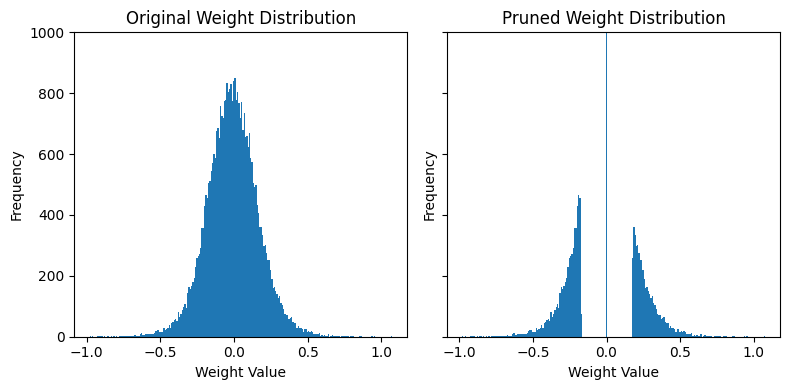

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

 # 원본 가중치 분포 플롯
original_weights = original_weights * 25
plot_weight_distribution(original_weights, 'Original Weight Distribution', axs[0])

# 프루닝된 가중치 분포 플롯
pruned_weights = pruned_weights * 25
plot_weight_distribution(pruned_weights, f'Pruned Weight Distribution', axs[1])

plt.ylim(top=1000)
plt.tight_layout()
plt.show()

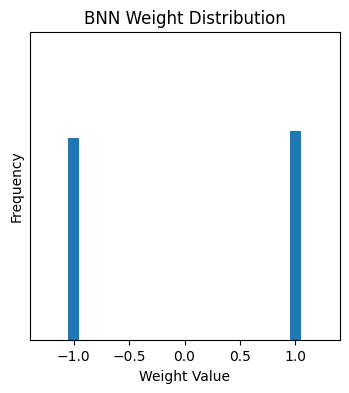

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 가중치 데이터 예시 (랜덤하게 생성된 -1과 1의 가중치)
weights = np.random.choice([-1, 1], size=2000)

# 각 가중치의 개수 카운트
unique, counts = np.unique(weights, return_counts=True)

# Bar 그래프 그리기
plt.figure(figsize=(4, 4))
plt.bar(unique, counts, width=0.1)
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.ylim([0,1500])
plt.yticks([])
plt.title('BNN Weight Distribution')
plt.xlim([-1.4, 1.4])
plt.show()

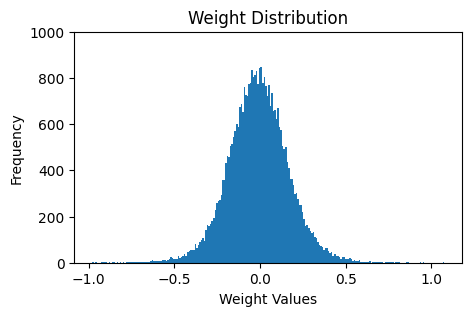

In [19]:
model = resnet18(pretrained=True)
module = model.layer1[0].conv2

weight = module.weight.data.cpu().numpy().flatten()
# Plot histogram of the weights for the current layer
orig_weight = weight*25
plt.figure(figsize=(5, 3))
plt.hist(orig_weight, bins=230, alpha=1)
plt.title(f'Weight Distribution')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.ylim(top=1000)
# plt.grid(True)
plt.show()